# Problem Statement

World Health Organization(WHO) conducted a world-wide survey and collected data from various regions of the world to determine life expectancy of the people of those regions. They collected this data through local sources and with the help of several local and internation NGOs that were operating in those areas.

The data we have is a sample of the original data collected by WHO. Your job is to follow the Data Science pipeline and build a Machine Learning model that will predict the average life expectancy of the people of an area based on given features. The pipeline is as follows:

1. Data Wrangling and Preprocessing
2. Exploratory Data Analysis
3. Feature Selection
4. Model Training
5. Testing and Optimization

***While solving this problem, build an intuition about which features are useful using a thorough analysis and build a regression model with minimum loss/error. The evaluation metric that will be used is Mean Absolute Error. Also make sure that you model is neither underfitting nor overfitting.***  

In [ ]:
#Mount drive

Mounted at /content/drive


In [ ]:
# If you want to install any missing packages, then uncomment the lines given below and run them
# to ensure that you have all the dependencies you need to run the notebook.


In [1]:
# Libraries
#List down here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from scipy.stats import gmean
from sklearn.preprocessing import LabelEncoder

## Data Description

The first thing you need to do before solving any Data Science problem is getting familiar with the dataset. Get to know your data by printing out some stats, checking its dimensions and checking data types of features.

Column | Description
:---|:---
`surface_area` | The total area in square kilometers
`agricultural_land` | The agricultural land of the total area in square kilometers
`forest_area` | The forest area in the total area in square kilometers
`armed_forces_total` | The count of armed forces paid by this geographical area
`urban_pop_major_cities` | The percent of the total population dwelling in major cities
`urban_pop_minor_cities` | The percent of the total population dwelling in minor cities
`national_income` | National Income as an ordinal categorical variable
`inflation_annual` | Yearly Inflation Rate
`inflation_monthly` | Average Monthly Inflation Rate = annual inflation/12
`inflation_weekly` | Average Weekly Inflation Rate = annual inflation/52
`mobile_subscriptions` | Describes the number of mobile subscriptions per person
`internet_users` | The average number of people using the internet in a range of 100 or 1000 people
`secure_internet_servers_total` | The actual number of secure internet servers in the area
`improved_sanitation` | The known access of the population to improved sanitation facilities
`women_parliament_seats_rate ` | Describes the percent range of parliament seats occupied by women
`life_expectancy` | Years of life an average person is expected to live in this area (target variable).

In [68]:
# Load training data from your google drive
data = pd.read_csv('train.csv')

In [69]:
# Dimensions of training data
data.shape

(362, 17)

In [70]:
# Explore columns in your dataset
data.columns

Index(['Unnamed: 0', 'surface_area', 'agricultural_land', 'forest_area',
       'armed_forces_total', 'urban_pop_major_cities',
       'urban_pop_minor_cities', 'national_income', 'inflation_annual',
       'inflation_monthly', 'inflation_weekly', 'mobile_subscriptions',
       'internet_users', 'secure_internet_servers_total',
       'improved_sanitation', 'women_parliament_seats_rate',
       'life_expectancy'],
      dtype='object')

In [71]:
# Description of your dataset
data.describe()

,Unnamed: 0,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total,life_expectancy
count,362.000000,3.620000e+02,3.580000e+02,3.570000e+02,3.180000e+02,360.000000,360.000000,146.000000,156.000000,20.000000,3.520000e+02,362.000000
mean,231.455801,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,1.681539,0.475969,0.396478,2.949654e+08,71.059691
std,134.799202,1.234491e+07,4.964143e+08,3.796623e+08,2.994686e+06,20.512885,21.206494,0.980308,0.153430,0.203583,7.234006e+08,8.332818
min,0.000000,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,-2.372263,0.250543,0.209993,4.002500e+04,48.850634
25%,116.250000,2.783000e+04,1.054198e+06,4.951445e+05,1.218000e+04,10.624625,11.013743,1.202953,0.347799,0.232118,3.468446e+06,65.469854
50%,233.500000,2.037745e+05,5.360256e+06,3.928535e+06,5.352500e+04,24.459439,26.735127,1.762683,0.459790,0.297938,2.671228e+07,73.238024
75%,349.750000,1.081610e+06,4.221935e+07,2.241297e+07,2.598000e+05,38.587177,43.499418,2.485675,0.577340,0.537541,2.173937e+08,77.125610
max,461.000000,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,2.997694,0.810152,0.781527,8.207343e+09,83.480488


In [72]:
# Check Datatypes
data.dtypes

Unnamed: 0                         int64
surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                   object
inflation_annual                 float64
inflation_monthly                float64
inflation_weekly                 float64
mobile_subscriptions              object
internet_users                    object
secure_internet_servers_total    float64
improved_sanitation               object
women_parliament_seats_rate       object
life_expectancy                  float64
dtype: object

In [73]:
# Print head of your dataset
data.head()

,Unnamed: 0,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


In [74]:
# Print tail of your dataset
data.tail()

,Unnamed: 0,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
357,457,243610.0,1.736999e+07,3.131596e+06,159150.0,42.818424,39.273576,high,2.554547,NaN,NaN,more than 1 per person,90 per 100 people,1.193275e+09,very high access,[0%-25%),80.956098
358,458,9831510.0,4.357576e+08,3.326943e+08,1433150.0,22.948363,58.328637,very high,1.464833,NaN,NaN,less than 1 per person,84 per 100 people,1.304449e+09,very high access,[0%-25%),78.841463
359,459,176220.0,1.446148e+07,1.811858e+06,25450.0,92.409069,2.573931,medium high,NaN,0.714595,NaN,more than 1 per person,58 per 100 people,7.511805e+07,very high access,[0%-25%),76.836195
360,460,330972.0,1.160670e+07,1.549346e+07,522000.0,27.411815,4.897185,low,NaN,0.549355,NaN,more than 1 per person,44 per 100 people,8.159726e+06,medium access,[0%-25%),75.756488
361,461,350.0,4.000000e+03,1.782000e+04,NaN,32.291719,62.772281,unknown,NaN,NaN,NaN,unknown,45 per 100 people,4.010044e+08,very high access,unknown,79.624390


## Data Wrangling and Preprocessing

This is perhaps the most time consuming and challenging part of any Data Science or Machine Learning problem. You have to preprocess your data in order to make it useful for data analysis and model training. Although, the steps involved vary depending on the problem and the dataset but here we have provided a roughly generic approach which is applicable for most problems. The steps involved are as follows:

1. Look for Null or Missing Values
2. Change data type of features, if required
3. Encode data of categorical features
4. Deal with Null or Missing values

In [75]:
# Check for any null or missing values
data.isnull().sum()
# columns with missing values
data.columns[data.isnull().any()]

Index(['agricultural_land', 'forest_area', 'armed_forces_total',
       'urban_pop_major_cities', 'urban_pop_minor_cities', 'inflation_annual',
       'inflation_monthly', 'inflation_weekly',
       'secure_internet_servers_total'],
      dtype='object')

In [76]:
# Check missing values in each column of training data
data.isnull().sum()

Unnamed: 0                         0
surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

In [77]:
# we have zero missing values in surface_area colum and to see how much it is correlated with forest_area 
# we will find correlation. Having high correlation means that surface_area is a good predictor for forest_area
# hence we will use Regression to fill missing values in forest_area column

surface_area_forest_area_corr = data['surface_area'].corr(data['forest_area'])
print(surface_area_forest_area_corr)


0.9835764656058498


R2 Score: 0.9720031519235981


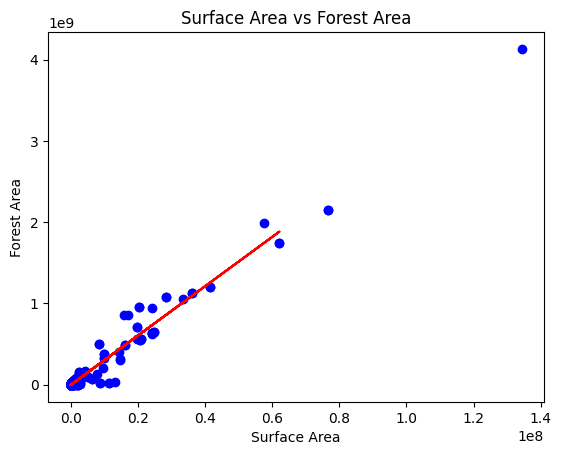

In [78]:

data_copy = data.copy()

data_copy.dropna(subset=['surface_area', 'forest_area'], inplace=True)

X = data_copy['surface_area'].values.reshape(-1, 1)
y = data_copy['forest_area'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


# plot the regression line 
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Surface Area')
plt.ylabel('Forest Area')
plt.title('Surface Area vs Forest Area')
plt.show()



In [79]:
# Fill missing values in forest_area column using surface_area column
data['forest_area'] = data.apply(
    lambda row: lr.predict([[row['surface_area']]])[0] if np.isnan(row['forest_area']) else row['forest_area'],
    axis=1
)



In [80]:
# Checking the correlation between agriculture_area and surface_area
agriculture_area_surface_area_corr = data['agricultural_land'].corr(data['surface_area'])
print(agriculture_area_surface_area_corr)

0.9872561341506503


R2 Score: 0.9672326023072718


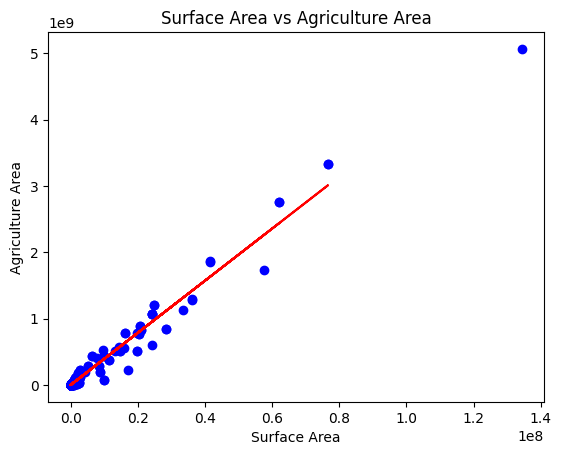

In [81]:
# Getting 0.98 correlation between agriculture_area and surface_area, we can use linear regression to fill missing values in agriculture_area column
data_copy = data.copy()

data_copy.dropna(subset=['agricultural_land', 'surface_area'], inplace=True)

X = data_copy['surface_area'].values.reshape(-1, 1)
y = data_copy['agricultural_land'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)

# plot the linear regression line
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Surface Area vs Agriculture Area')
plt.xlabel('Surface Area')
plt.ylabel('Agriculture Area')
plt.show()



In [82]:
# Fill missing values in agriculture_area column using surface_area column
data['agricultural_land'] = data.apply(
    lambda row: lr.predict([[row['surface_area']]])[0] if np.isnan(row['agricultural_land']) else row['agricultural_land'],
    axis=1
)

# check for missing values
data.isnull().sum()


Unnamed: 0                         0
surface_area                       0
agricultural_land                  0
forest_area                        0
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

In [83]:
correlation = data['armed_forces_total'].corr(data['surface_area'])
print(correlation)

0.9353627656424193


R2 Score: 0.8654565322512711


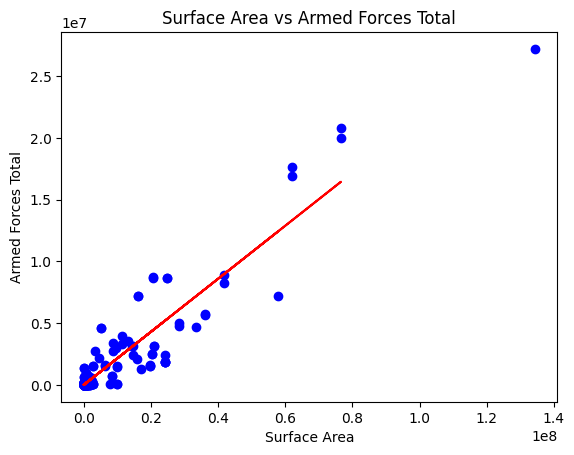

In [84]:
# Getting 0.93 correlation between armed_forces_total and surface_area, we can use linear regression to fill missing values in armed_forces_total column
data_copy = data.copy()

data_copy.dropna(subset=['armed_forces_total', 'surface_area'], inplace=True)

X = data_copy['surface_area'].values.reshape(-1, 1)

y = data_copy['armed_forces_total'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)

# plot the linear regression line
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Surface Area vs Armed Forces Total')
plt.xlabel('Surface Area')
plt.ylabel('Armed Forces Total')
plt.show()


In [85]:
# Fill missing values in armed_forces_total column using surface_area column
data['armed_forces_total'] = data.apply(
    lambda row: lr.predict([[row['surface_area']]])[0] if np.isnan(row['armed_forces_total']) else row['armed_forces_total'],
    axis=1
)
# check for missing values
data.isnull().sum()

Unnamed: 0                         0
surface_area                       0
agricultural_land                  0
forest_area                        0
armed_forces_total                 0
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

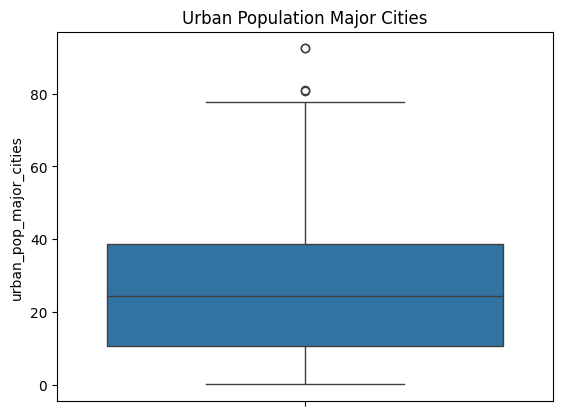

In [86]:
# check for outliers by plotting boxplot
# plot boxplot
sns.boxplot(data['urban_pop_major_cities'])
plt.title('Urban Population Major Cities')
plt.show()


In [87]:
# since we have outliers in urban_pop_major_cities column, we will use geometric mean to fill missing values
urban_pop_major_cities = data['urban_pop_major_cities']

urban_pop_major_cities = urban_pop_major_cities.dropna()

geometric_mean = gmean(urban_pop_major_cities)

data['urban_pop_major_cities'] = data['urban_pop_major_cities'].fillna(geometric_mean)

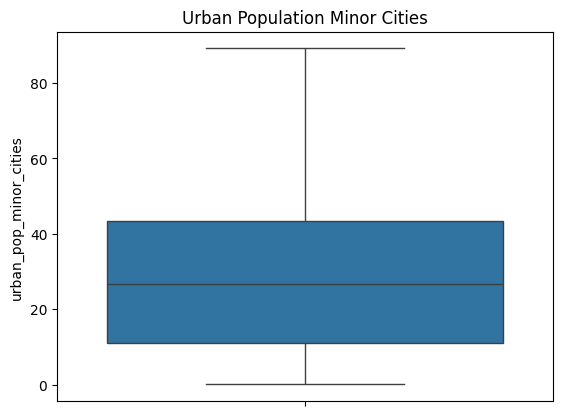

In [88]:

sns.boxplot(data['urban_pop_minor_cities'])
plt.title('Urban Population Minor Cities')
plt.show()


In [89]:
# since no outliers in urban_pop_minor_cities column, we will use mean to fill missing values
urban_pop_minor_cities = data['urban_pop_minor_cities']

urban_pop_minor_cities = urban_pop_minor_cities.dropna()

mean = urban_pop_minor_cities.mean()

data['urban_pop_minor_cities'] = data['urban_pop_minor_cities'].fillna(mean)


In [102]:
# check for missing values
data.isnull().sum()

Unnamed: 0                         0
surface_area                       0
agricultural_land                  0
forest_area                        0
armed_forces_total                 0
urban_pop_major_cities             0
urban_pop_minor_cities             0
national_income                    0
inflation_annual                 216
inflation_monthly                  1
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
inflation_annual_ffill             3
inflation_annual_local_mean        3
dtype: int64

In [44]:
le = LabelEncoder()

data['internet_users_encoded'] = le.fit_transform(data['internet_users'])
data['mobile_subscriptions_encoded'] = le.fit_transform(data['mobile_subscriptions'])
data['national_income_encoded'] = le.fit_transform(data['national_income'])

In [94]:
# fill missing values in inflation_monthly column using sliding window method
data['inflation_monthly'] = data['inflation_monthly'].fillna(method='ffill')


C:\Users\Mr  Rabbani\AppData\Local\Temp\ipykernel_27268\2586892543.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['inflation_monthly'] = data['inflation_monthly'].fillna(method='ffill')


C:\Users\Mr  Rabbani\AppData\Local\Temp\ipykernel_27268\3043669408.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['inflation_annual_ffill'] = data['inflation_annual'].fillna(method='ffill')


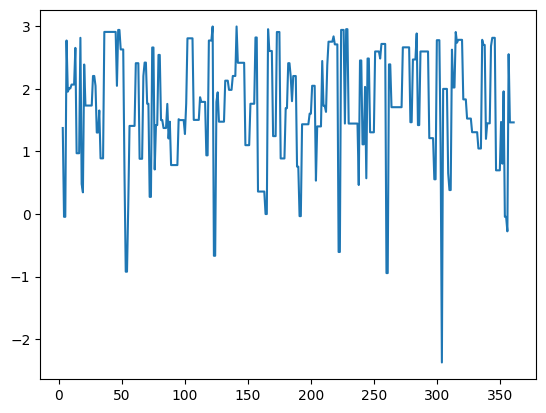

In [99]:
# fill missing values in inflation_annual column using sliding window method

data['inflation_annual_ffill'] = data['inflation_annual'].fillna(method='ffill')
plt.plot(data['inflation_annual_ffill'])

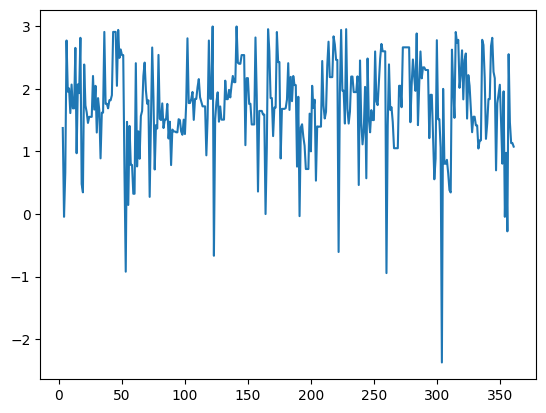

In [101]:
# fill missing values in inflation_annual column using local mean with window size of 10
data['inflation_annual_local_mean'] = data['inflation_annual'].fillna(data['inflation_annual'].rolling(window=10, min_periods=1).mean())
plt.plot(data['inflation_annual_local_mean'])

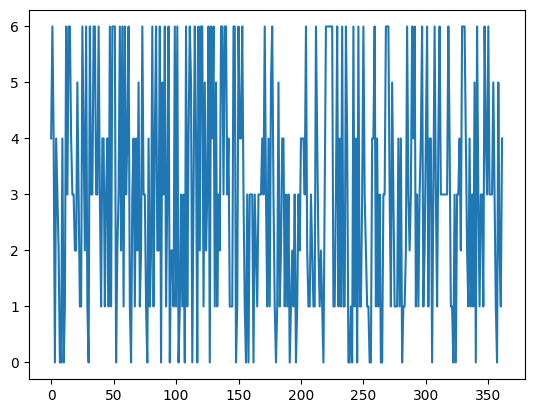

In [51]:

plt.heigh
plt.plot(data['national_income_encoded'])
plt.show()

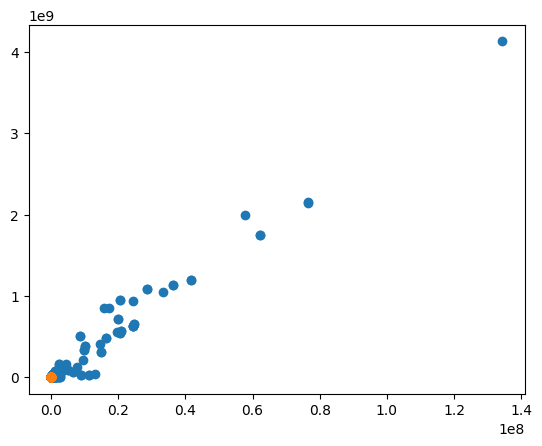

In [117]:
# correlation = data['inflation_annual'].corr(data['national_income_encoded'])

plt.scatter(data['surface_area'], data['forest_area'])

# scatter plot between inflation_annual
plt.scatter(data['inflation_annual'], data['life_expectancy'])

In [43]:
correlation = data['inflation_annual'].corr(data['life_expectancy'])
print(correlation)

correlation = data['inflation_monthly'].corr(data['life_expectancy'])
print(correlation)

correlation = data['inflation_weekly'].corr(data['life_expectancy'])
print(correlation)

0.016946732671828762
-0.30036188395504554
0.4055083663251723


In [108]:
# print(data['mobile_subscriptions'].dtype)

col_list = [c for c in data.columns if data[c].dtype == 'object']
col_list

['national_income',
 'mobile_subscriptions',
 'internet_users',
 'improved_sanitation',
 'women_parliament_seats_rate']

In [274]:
#Unique values in 'women_parliament_seats_rate'

data['women_parliament_seats_rate'].unique()

array(['[0%-25%)', 'unknown', '[25%-50%)', '[50%-75%)'], dtype=object)

In [105]:
# Make a copy of data
copy_data = data.copy()

In [106]:
# Change data types of columns
le = LabelEncoder()
copy_data['national_income'] = le.fit_transform(copy_data['national_income'])

copy_data['mobile_subscriptions'] = le.fit_transform(copy_data['mobile_subscriptions'])

copy_data['improved_sanitation'] = le.fit_transform(copy_data['improved_sanitation'])

copy_data['women_parliament_seats_rate'] = le.fit_transform(copy_data['women_parliament_seats_rate'])

In [107]:
# Compare Actual and Encoded labels
print(copy_data['national_income'].unique())
print(data['national_income'].unique())

print(copy_data['mobile_subscriptions'].unique())
print(data['mobile_subscriptions'].unique())

print(copy_data['improved_sanitation'].unique())
print(data['improved_sanitation'].unique())

print(copy_data['women_parliament_seats_rate'].unique())
print(data['women_parliament_seats_rate'].unique())

[4 6 0 3 2 1 5]
['unknown' 'very low' 'high' 'medium low' 'medium high' 'low' 'very high']
[0 1 2 4 3]
['less than 1 per person' 'more than 1 per person'
 'more than 2 per person' 'unknown' 'more than 3 per person']
[0 1 3 4 2 5]
['high access' 'low access' 'no info' 'very high access' 'medium access'
 'very low access']
[0 3 1 2]
['[0%-25%)' 'unknown' '[25%-50%)' '[50%-75%)']


In [109]:
# Convert unknown in internet_uses to -1
data['internet_users'] = data['internet_users'].replace('unknown', -1)

In [110]:
non_integer_values = data['internet_users'][data['internet_users'].apply(lambda x: isinstance(x, str))]

# Apply LabelEncoder only to non-integer values
le = LabelEncoder()
data.loc[non_integer_values.index, 'internet_users'] = le.fit_transform(non_integer_values)

In [ ]:
# Deal with Missing Values use suitable method for all mentioned columns
columns = ['agricultural_land', 'forest_area', 'armed_forces_total',
           'urban_pop_minor_cities', 'urban_pop_major_cities','inflation_annual' ,'inflation_monthly','inflation_weekly','secure_internet_servers_total']



In [ ]:
# Show all the attribute after filling in data points

surface_area                     0
agricultural_land                0
forest_area                      0
armed_forces_total               0
urban_pop_major_cities           0
urban_pop_minor_cities           0
national_income                  0
inflation_annual                 0
mobile_subscriptions             0
internet_users                   0
secure_internet_servers_total    0
improved_sanitation              0
women_parliament_seats_rate      0
life_expectancy                  0
dtype: int64

## Data Analysis and Visualizations

Performing a detailed analysis of the data helps you understand which features are important, what's their correlation with each other which features would contribute in predicting the target variable. Different types of visualizations and plots can help you acheive that. These include:

1. Bar Plots
2. Joint Plots
3. Box Plots
4. Correlation Heatmap
5. Distribution Plot
6. PCA Bi-plot

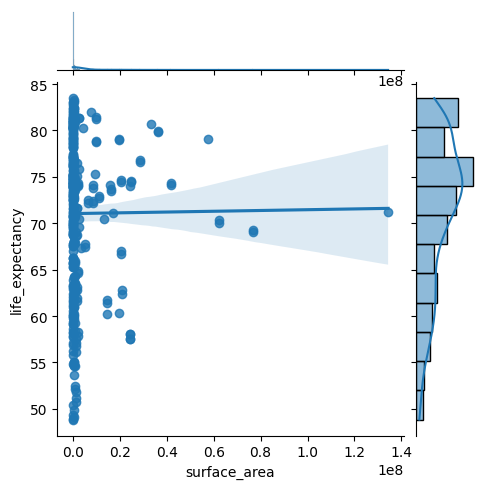

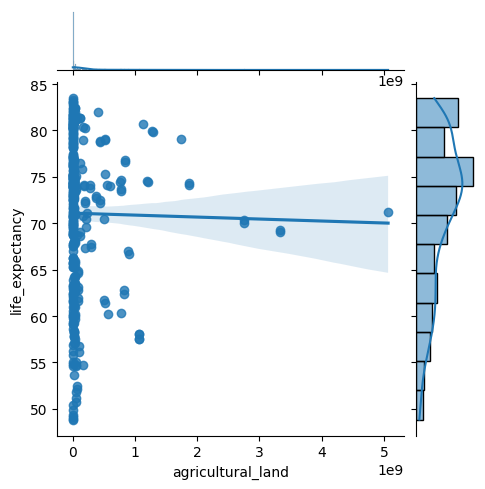

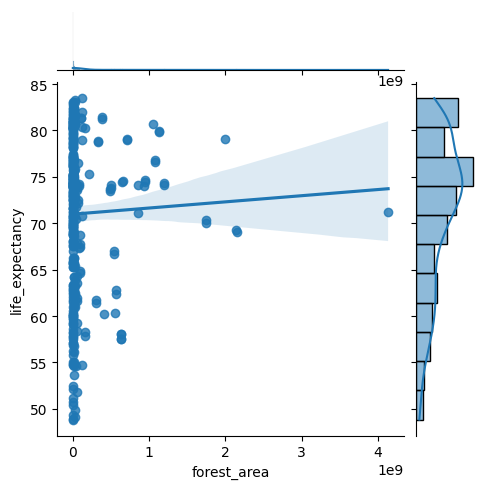

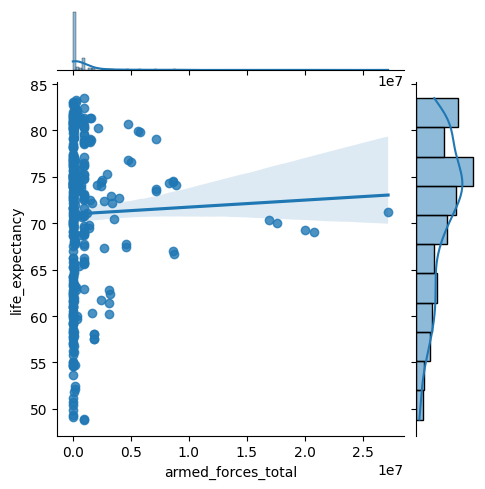

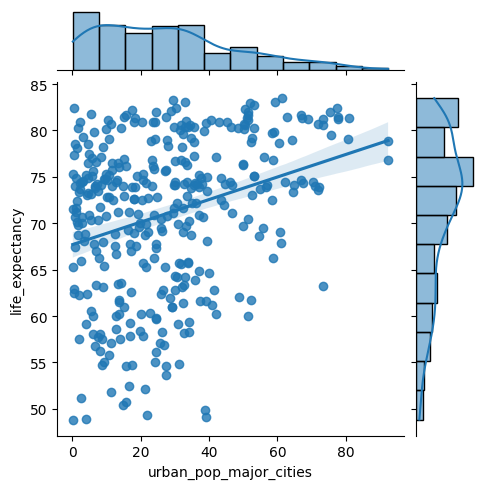

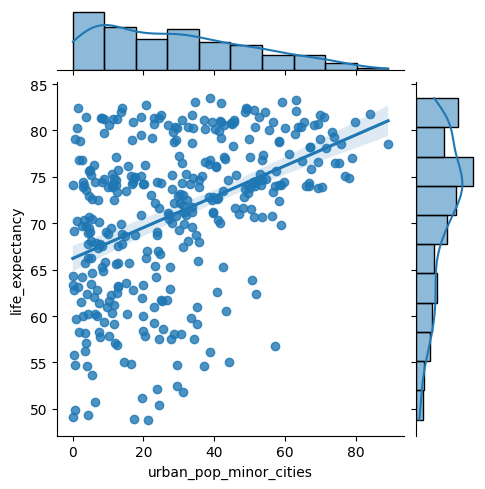

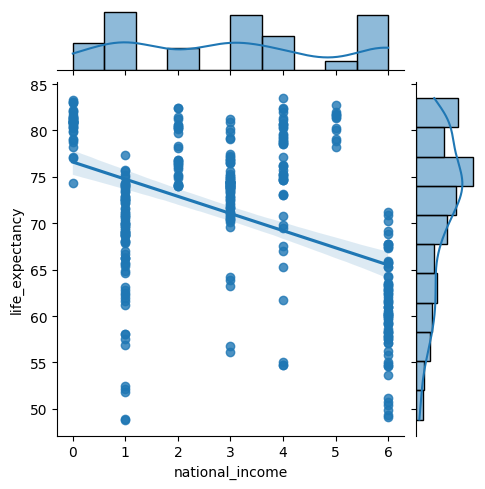

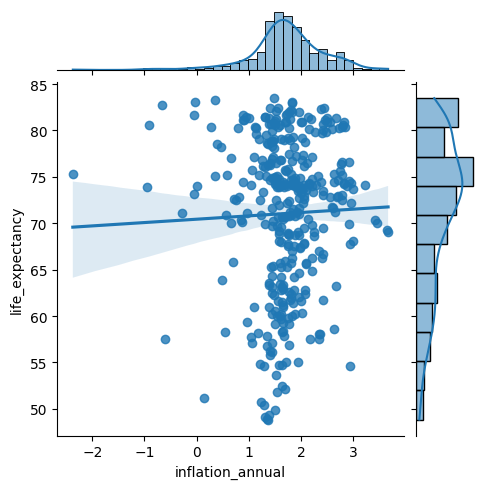

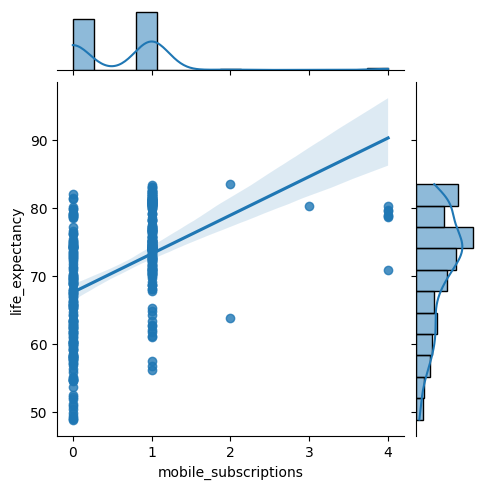

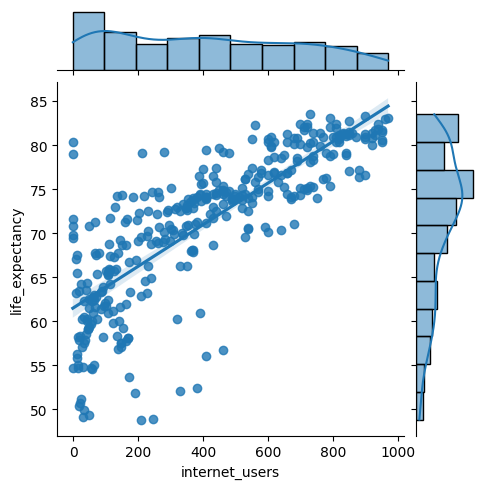

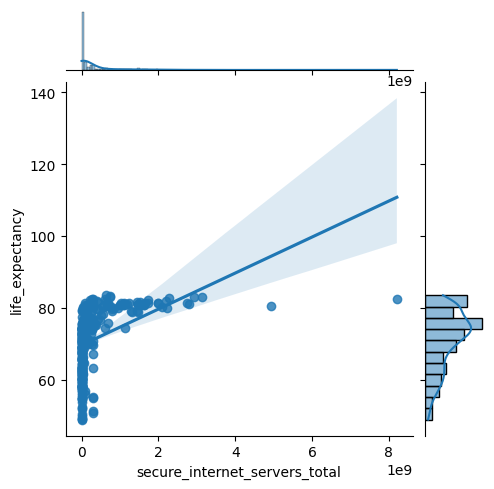

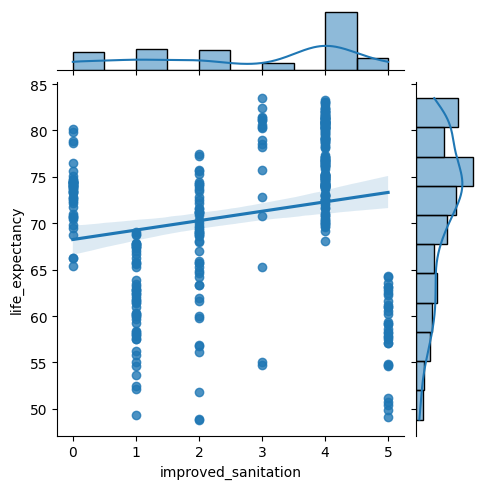

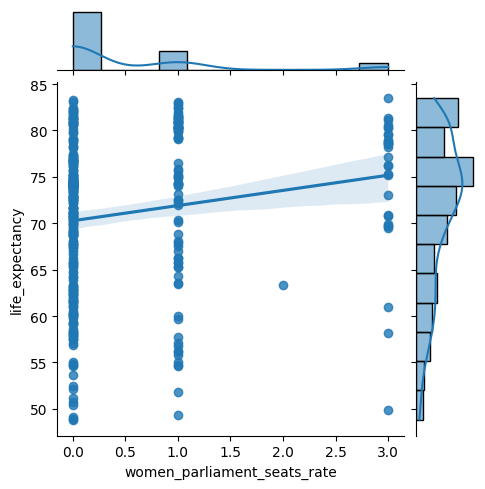

In [ ]:
# plot joint plots for 'life_expectancy'
sns.jointplot(data['life_expectancy'], data['internet_users'], kind='reg')

In [299]:
# Correlation heatmap where correlation value is greater than or eual to +0.5 and less than or equal to -0.4
# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-0.4, vmax=0.5)
plt.title('Correlation Heatmap')
plt.show()



ValueError: could not convert string to float: 'unknown'

<Figure size 1200x800 with 0 Axes>

<ipython-input-35-9b1248016323>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['life_expectancy']);


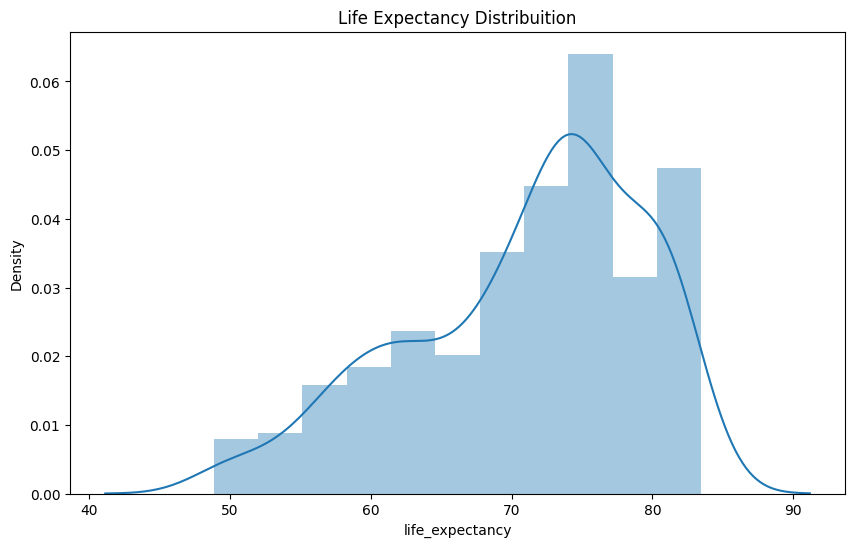

In [ ]:
# distribution plot of target variable (life expectancy)


## Feature Selection

After performing a thorough analysis, we can select useful features required and train the model using those features. Sometimes, we can simply pass all the features and then determine important features from the trained classifier by evaluating the weights assigned by the classifier to each features. We'll get to that later on.

In [1]:
# Fetures agricultural_land and forest_area are highly correlated with surface_area.
# Remove agricultural_land, forest_area, inflation monthly and weekly and keep surface_area only

data_copy = data.copy()
data_copy.drop(['agricultural_land', 'forest_area', 'inflation_monthly', 'inflation_weekly'], axis=1, inplace=True)

data_copy.shape



NameError: name 'data' is not defined

## Model Training

This is a Regression problem since we are predicting life expetancy which is a continous random variable. The steps involved are as follows:

1. Standardize or Normalize Training Data
2. Train Test Split
3. Train Model
4. Evaluate Important Features

**Note: It's a good practice to train multiple models (2 or 3 at least) and then choose the best performing model.**

In [ ]:
# Standardize data
from sklearn.preprocessing import StandardScaler

# Columns not to be standardized. These are columns with categorical data,
# also we don't standardize our target vraiable
cols = ['national_income', 'mobile_subscriptions', 'life_expectancy',
        'improved_sanitation', 'women_parliament_seats_rate']

# Pick remaining columns and standardize them


In [ ]:
# Train Test Split



Training Set Dimensions: (289, 11)
Validation Set Dimensions: (73, 11)


In [ ]:
# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error



RandomForestRegressor(n_estimators=200)

In [ ]:
# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, randomf.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, randomf.predict(X_test)))

Mean Absolute Error for Training Set: 1.007585883349299
Mean Absolute Error for Test Set: 3.3298357912369565


feature: surface_area = 0.033477107293291876
feature: armed_forces_total = 0.026343825929538836
feature: urban_pop_major_cities = 0.016256793018149994
feature: urban_pop_minor_cities = 0.019410753199951558
feature: national_income = 0.01915031500521863
feature: inflation_annual = 0.0578911822509532
feature: mobile_subscriptions = 0.011021863265279591
feature: internet_users = 0.6490227769605157
feature: secure_internet_servers_total = 0.14328621047095916
feature: improved_sanitation = 0.014991310432210435
feature: women_parliament_seats_rate = 0.009147862173931084


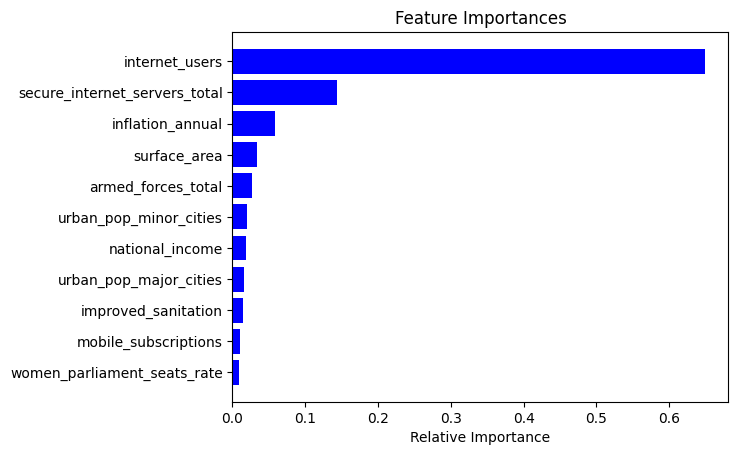

In [ ]:
# important features for random forest regressor
for name, importance in zip(X.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)
